#Overview

Your company now sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

#Business Understanding
The Objective of this analysis is to determine whether it is worthwhile delving into the movie industry and which particular films are currently doing the best at the box office. To achieve this, we will investigate the following;
    1. What is the cost of production vis-a-vis the domestic_gross and worldwide_gross?.
    2. What are the Profits and Return on Investment(how much profit you make relative to the cost of your investment)on different films?
    3. What is the trend of Profitability and ROI over time?
    4. Is the domestic or international market driving profitability more?

In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
#Importing the csv file

df = pd.read_csv("tn.movie_budgets.csv")
df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


#From our column names, we can expound the following;

#Production_budget is the amount of money spent to make the movie, covering things like:
cast and crew salaries
set design, props, costumes
filming equipment, cameras, sound, etc.
editing, visual effects (VFX), post-production

#Domestic_gross refers to the total box office revenue earned within the domestic market, which usually means the United States and Canada.

#Worldwide_gross refers to total box office revenue earned globally. It includes the domestic gross plus international grosses (all other countries).

#To determine the types of films that are currently doing the best at the box office, cost is a factor. Two major aspects that we can delve into is the profit and return on investment(ROI)


In [3]:
#outlining first five columns
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
#Summary of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
#Standardizing column names for consistency and ease of reference

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("Standardized columns:", df.columns.tolist())

Standardized columns: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


In [6]:
#removing duplicated vaues
#Ensures each row (movie) is unique, preventing bias or double-counting in analysis.

df = df.drop_duplicates()

In [7]:
#Convert release_date to datetime-Converts the release_date column into a datetime object

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

In [8]:
#Keep $ version, create numeric version for analysis

money_cols = ["production_budget", "domestic_gross", "worldwide_gross"]

for col in money_cols:
    # Numeric version (for calculations)
    df[col + "_num"] = (
        df[col]
        .astype(str)
        .str.replace(r"[\$,]", "", regex=True)   # remove $ and ,
        .astype(float)
    )

In [9]:
#Outlook of the cleaned data

print("Shape:", df.shape)
print(df.dtypes)
df.head()

Shape: (5782, 9)
id                                int64
release_date             datetime64[ns]
movie                            object
production_budget                object
domestic_gross                   object
worldwide_gross                  object
production_budget_num           float64
domestic_gross_num              float64
worldwide_gross_num             float64
dtype: object


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,production_budget_num,domestic_gross_num,worldwide_gross_num
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",317000000.0,620181382.0,1.316722e+09


In [10]:
#VISUALIZATION

Average Domestic Gross vs Budget: 2.98x
Average Worldwide Gross vs Budget: 4.80x


/tmp/ipykernel_18432/192958412.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["domestic_ratio"], df["worldwide_ratio"]], labels=["Domestic", "Worldwide"])


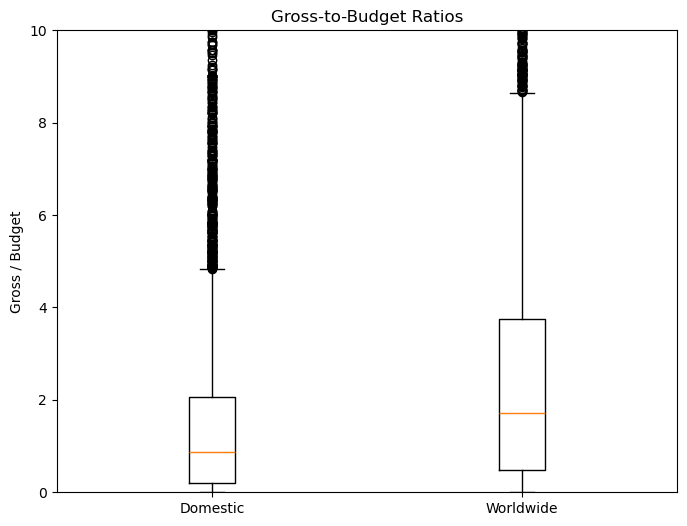

In [13]:
#COST OF PRODUCTION COMPARED TO THE DOMESTIC AND WORLDWIDE RATIOS
#Domestic and Worldwide ratios are used to calculate how many times the budget was recovered

df["domestic_ratio"] = df["domestic_gross_num"] / df["production_budget_num"]
df["worldwide_ratio"] = df["worldwide_gross_num"] / df["production_budget_num"]

# Average ratios
avg_domestic = df["domestic_ratio"].mean()
avg_worldwide = df["worldwide_ratio"].mean()
print(f"Average Domestic Gross vs Budget: {avg_domestic:.2f}x")
print(f"Average Worldwide Gross vs Budget: {avg_worldwide:.2f}x")

# Boxplot comparison
plt.figure(figsize=(8,6))
plt.boxplot([df["domestic_ratio"], df["worldwide_ratio"]], labels=["Domestic", "Worldwide"])
plt.title("Gross-to-Budget Ratios")
plt.ylabel("Gross / Budget")
plt.ylim(0,10)  # Cap to focus on most films (ignore extreme outliers)
plt.show()

In [ ]:
#Interpretation
domestic ratios < 1 this implies most films don’t earn back their budget in the U.S./Canada alone.
Worldwide ratios > 1 more often international markets are crucial

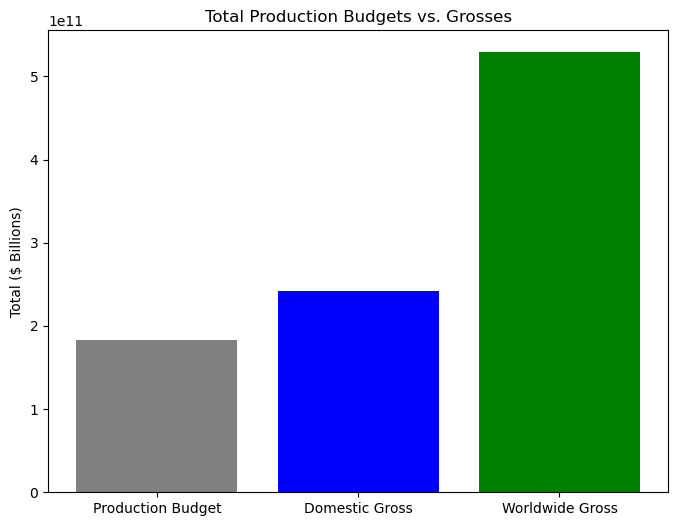

In [14]:
#Aggregate Bar Chart
#Show the total production budgets vs. total domestic and worldwide grosses across all films.
    totals = {
    "Production Budget": df["production_budget_num"].sum(),
    "Domestic Gross": df["domestic_gross_num"].sum(),
    "Worldwide Gross": df["worldwide_gross_num"].sum()
}

plt.figure(figsize=(8,6))
plt.bar(totals.keys(), totals.values(), color=["gray", "blue", "green"])
plt.title("Total Production Budgets vs. Grosses")
plt.ylabel("Total ($ Billions)")
plt.show()

#2.What are the Profits and Return on Investment on different films


In [19]:
#Profit = Worldwide Gross – Production Budget
#ROI = Profit ÷ Production Budget

# Calculate profit and ROI
df["profit_num"] = df["worldwide_gross_num"] - df["production_budget_num"]
df["roi_num"] = df["profit_num"] / df["production_budget_num"]

# Preview
df[["movie", "production_budget_num", "worldwide_gross_num", "profit_num", "roi_num"]].head()

,movie,production_budget_num,worldwide_gross_num,profit_num,roi_num
0,Avatar,425000000.0,2.776345e+09,2.351345e+09,5.532577
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,6.350639e+08,1.546673
2,Dark Phoenix,350000000.0,1.497624e+08,-2.002376e+08,-0.572108
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,1.072414e+09,3.243841
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,9.997217e+08,3.153696


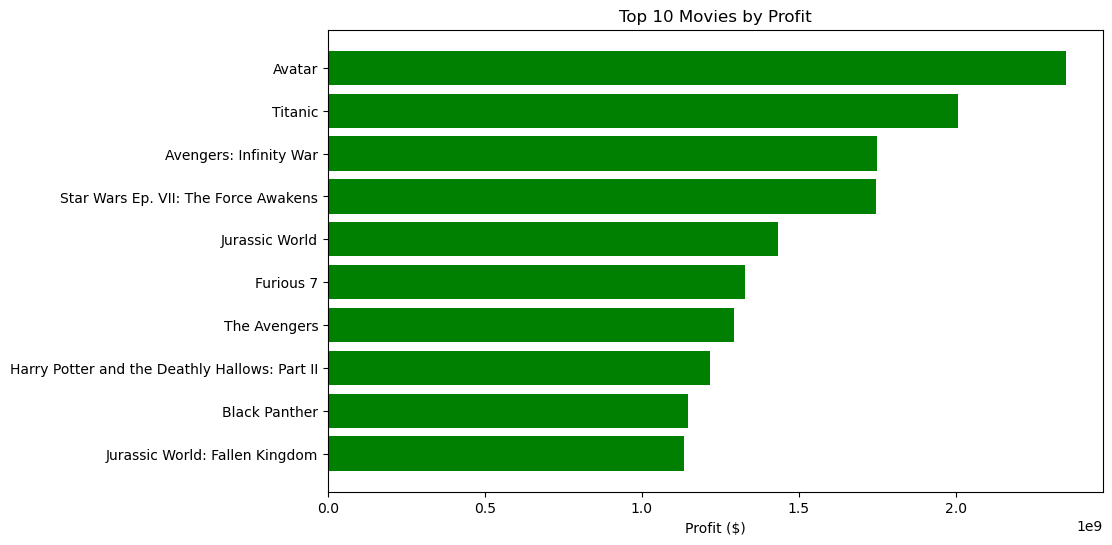

In [21]:
#Top Ten Movies by Profit
top_profit = df.sort_values("profit_num", ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,6))
plt.barh(top_profit["movie"], top_profit["profit_num"], color="green")
plt.title("Top 10 Movies by Profit")
plt.xlabel("Profit ($)")
plt.gca().invert_yaxis()  # Highest on top
plt.show()

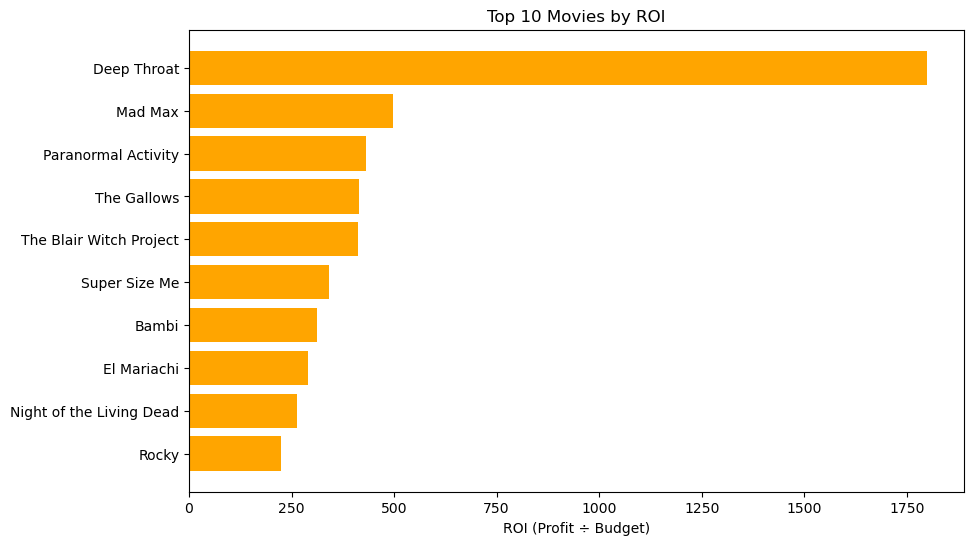

In [22]:
#Top 10 Movies by ROI

top_roi = df.sort_values("roi_num", ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10,6))
plt.barh(top_roi["movie"], top_roi["roi_num"], color="orange")
plt.title("Top 10 Movies by ROI")
plt.xlabel("ROI (Profit ÷ Budget)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#What is the trend of Profitability and ROI over time?

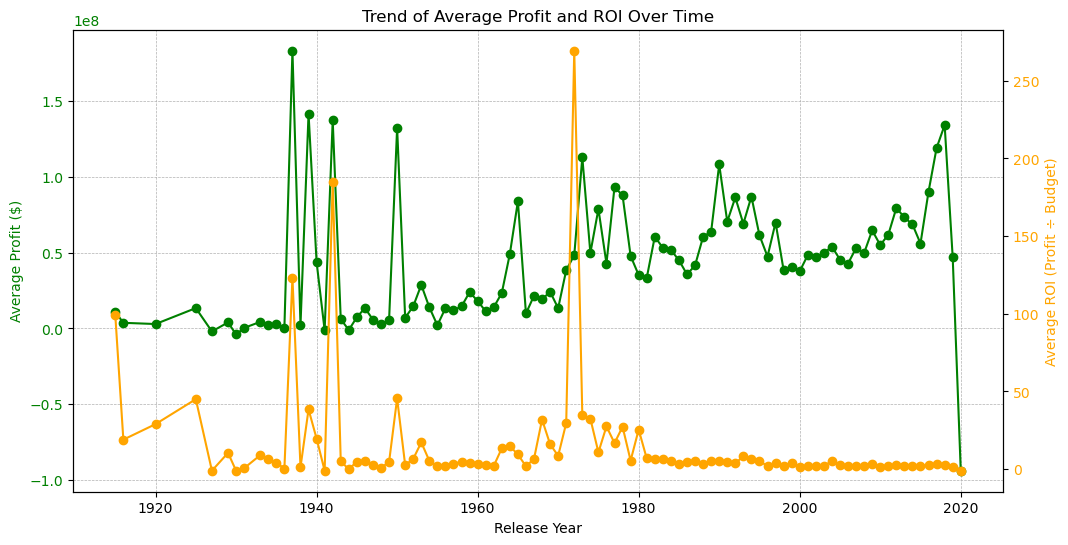

In [28]:
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot Average Profit on left y-axis
color = 'green'
ax1.set_xlabel("Release Year")
ax1.set_ylabel("Average Profit ($)", color=color)
ax1.plot(yearly_trends["release_year"], yearly_trends["profit_num"], marker="o", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create a second y-axis for ROI
ax2 = ax1.twinx()
color = 'orange'
ax2.set_ylabel("Average ROI (Profit ÷ Budget)", color=color)
ax2.plot(yearly_trends["release_year"], yearly_trends["roi_num"], marker="o", color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title
plt.title("Trend of Average Profit and ROI Over Time")
plt.show()

Green line (Profit): Shows absolute earnings. Peaks indicate blockbuster-heavy years.
Orange line (ROI): Shows efficiency of investment. A high ROI means smaller-budget films gave great returns.
Sometimes a year may have high profit but low ROI → big-budget films made money but were less efficient.
Sometimes a year has moderate profit but high ROI → low-budget hits dominated.
Therefore, we recommend balancing big-budget blockbusters (high absolute profit) with low-budget, high-ROI films to maximize overall portfolio returns.

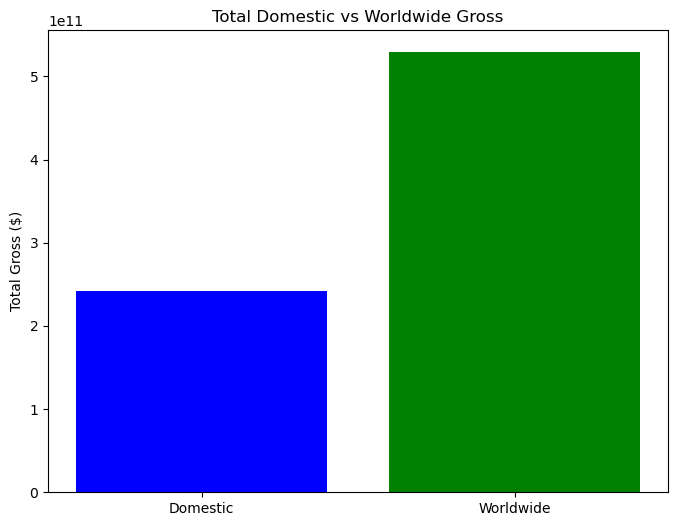

In [31]:
totals = {
    "Domestic": df["domestic_gross_num"].sum(),
    "Worldwide": df["worldwide_gross_num"].sum()
}

plt.figure(figsize=(8,6))
plt.bar(totals.keys(), totals.values(), color=["blue", "green"])
plt.title("Total Domestic vs Worldwide Gross")
plt.ylabel("Total Gross ($)")
plt.show()

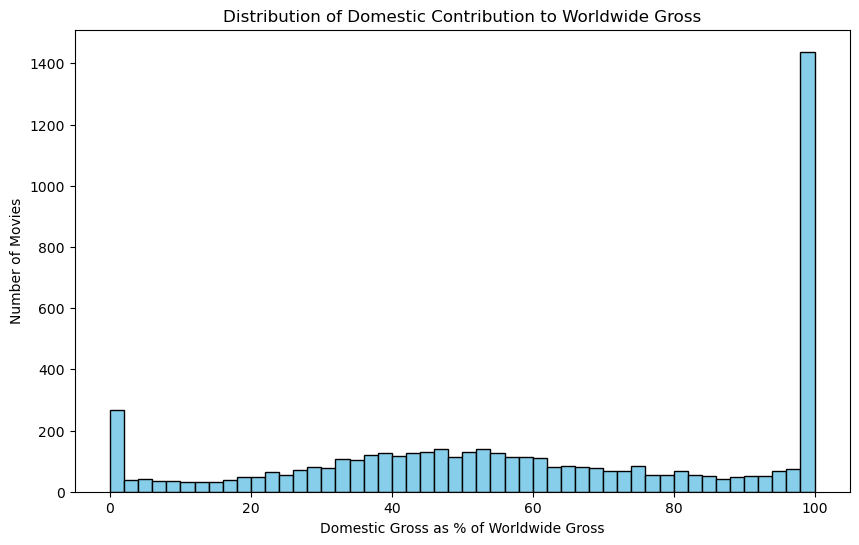

In [32]:
#Ratio per movie
#how much of worldwide gross comes from domestic earnings

df["domestic_pct"] = df["domestic_gross_num"] / df["worldwide_gross_num"] * 100

plt.figure(figsize=(10,6))
plt.hist(df["domestic_pct"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Domestic Contribution to Worldwide Gross")
plt.xlabel("Domestic Gross as % of Worldwide Gross")
plt.ylabel("Number of Movies")
plt.show()